In [359]:
import couchdb
import pandas as pd
# from couchdb_settings import *

username = 'admin'
password = '123456'
address = 'localhost:15984'

    
testdb = couchdb.Database('http://' + address + '/view-test')
testdb.resource.credentials = (username, password)


languages = {}

for item in testdb.view('geo-test/lang-count', group = True, group_level = 1):
    if item.key != 'en':
        if item.key == 'in':
            languages['id'] = item.value
        else:
            languages[item.key] = item.value
            
        languages = {k:v for k, v in sorted(languages.items(), key=lambda item: item[1])[::-1][:20]}

print(languages)

langCode = {}

with open('Data/langCode.json', 'r', encoding= 'utf-8') as f:
    for line in f:
        (val, key) = line.split()
        langCode[key] = val
        
languages = {v2: v1 for k1, v1 in languages.items() for k2, v2 in langCode.items() if k1 == k2}

print(languages)

{'id': 94, 'es': 44, 'fr': 31, 'tl': 30, 'ja': 29, 'et': 25, 'pt': 18, 'no': 17, 'de': 17, 'it': 16, 'tr': 12, 'ar': 10, 'da': 10, 'ht': 10, 'th': 7, 'zh': 6, 'nl': 6, 'fi': 5, 'sl': 5, 'ru': 4}
{'Indonesian': 94, 'Spanish': 44, 'French': 31, 'Tagalog': 30, 'Japanese': 29, 'Estonian': 25, 'Portuguese': 18, 'Norwegian': 17, 'German': 17, 'Italian': 16, 'Turkish': 12, 'Arabic': 10, 'Danish': 10, 'Haitian': 10, 'Thai': 7, 'Chinese': 6, 'Dutch': 6, 'Finnish': 5, 'Slovenian': 5, 'Russian': 4}


In [ ]:
def top_10_lang_count(db)

    for item in testdb.view('geo-test/lang-count', group = True, group_level = 1):
        if item.key != 'en':
            languages[item.key] = item.value
            languages = {k:v for k, v in sorted(languages.items(), key=lambda item: item[1])[::-1][:10]}
            
    return languages

In [350]:
def top_10_birth_country(file):
    data = pd.read_csv(file)
    
    match_cols = []
    new_cols = []
    col_names = data.columns
    for name in col_names:
        if name.endswith('_p'):
            match_cols.append(name)
            new_cols.append(name.strip())

    ext_data = pd.DataFrame(data[match_cols])
    ext_data.columns = new_cols
    
    grand_total = ext_data['tot_p'].sum(axis = 0)
    country_total = ext_data.sum(axis = 0)
    percentage = country_total/grand_total * 100
    
    birth_country = pd.DataFrame(country_total, columns = ['country_total'])
    birth_country['percentage'] = percentage
    birth_country = birth_country.sort_values(by = ['country_total'], ascending = False)
    
    drop_columns = ['hong_kong_sar_china_p', 'born_elsewhere_p', 'tot_p', 'os_visitors_p', 'country_birth_not_stated_p', 'australia_p', 'new_zealand_p', 'united_states_america_p', 'united_kingdom_ci_im_p', 'fiji_p', 'south_africa_p']
    
    birth_country.loc['china_excl_sars_taiwan_p'] = birth_country.loc['china_excl_sars_taiwan_p'] + birth_country.loc['hong_kong_sar_china_p']
    birth_country = birth_country.T.drop(drop_columns, axis = 1).T[:20].T
    birth_country = birth_country.rename({'china_excl_sars_taiwan_p' : 'china_p', 'sri_lanka_p' : 'srilanka_p'}, axis = 1)
    
    country_names = []
    for item in birth_country.columns:
        item = item.split('_')
        country_names.append(item[0].capitalize())

    birth_country.columns = country_names
    birth_country = birth_country.rename({'Srilanka' : 'Sri Lanka'}, axis = 1).T
    
    return birth_country

top_10_birth_country('Data/AURIN/country_of_birth.csv')

,country_total,percentage
India,160058.0,3.538028
China,174418.0,3.855451
Vietnam,78036.0,1.724960
Italy,61521.0,1.359901
Sri Lanka,52658.0,1.163987
Malaysia,45852.0,1.013543
Greece,43881.0,0.969975
Philippines,43642.0,0.964692
Pakistan,19127.0,0.422796
Germany,17511.0,0.387075


In [284]:
data = pd.read_csv('country_of_birth.csv')

In [285]:
match_cols = []
new_cols = []

col_names = data.columns

for name in col_names:
    if name.endswith('_p'):
        match_cols.append(name)
        new_cols.append(name.strip())

ext_data = pd.DataFrame(data[match_cols])
ext_data.columns = new_cols

In [286]:
grand_total = ext_data['tot_p'].sum(axis = 0)
country_total = ext_data.sum(axis = 0)
percentage = country_total/grand_total * 100
birth_country = pd.DataFrame(country_total, columns = ['country_total'])
birth_country['percentage'] = percentage

In [287]:
birth_country = birth_country.sort_values(by = ['country_total'], ascending = False)

In [288]:
drop_columns = ['hong_kong_sar_china_p', 'born_elsewhere_p', 'tot_p', 'os_visitors_p', 'country_birth_not_stated_p', 'australia_p', 'new_zealand_p', 'united_states_america_p', 'united_kingdom_ci_im_p', 'fiji_p', 'south_africa_p']

In [289]:
birth_country.loc['china_excl_sars_taiwan_p'] += birth_country.loc['hong_kong_sar_china_p']
birth_country = birth_country.T.drop(drop_columns, axis = 1).T[:10].T
birth_country = birth_country.rename({'china_excl_sars_taiwan_p' : 'china_p', 'sri_lanka_p' : 'srilanka_p'}, axis = 1)

In [290]:
names = []
for item in birth_country.columns:
    item = item.split('_')
    names.append(item[0].capitalize())

birth_country.columns = names

In [300]:
birth_country = birth_country.rename({'Srilanka' : 'Sri Lanka'}, axis = 1).T

In [365]:
birth_country.index

Index(['India', 'China', 'Vietnam', 'Italy', 'Sri Lanka', 'Malaysia', 'Greece',
       'Philippines', 'Pakistan', 'Germany'],
      dtype='object')

In [317]:
results = []

for i in range(len(birth_country)):
    entry = {}
    e = birth_country.iloc[i]
    entry['name'] = e.name
    entry['y'] = e.country_total
    entry['z'] = e.percentage
    results.append(entry)
print(results)

[{'name': 'India', 'y': 160058.0, 'z': 3.5380284230620616}, {'name': 'China', 'y': 174418.0, 'z': 3.85545140819977}, {'name': 'Vietnam', 'y': 78036.0, 'z': 1.7249596147775874}, {'name': 'Italy', 'y': 61521.0, 'z': 1.3599010772045204}, {'name': 'Sri Lanka', 'y': 52658.0, 'z': 1.1639874339402094}, {'name': 'Malaysia', 'y': 45852.0, 'z': 1.0135430859703463}, {'name': 'Greece', 'y': 43881.0, 'z': 0.9699747918403725}, {'name': 'Philippines', 'y': 43642.0, 'z': 0.9646917769763117}, {'name': 'Pakistan', 'y': 19127.0, 'z': 0.42279592177778097}, {'name': 'Germany', 'y': 17511.0, 'z': 0.38707478361743725}]


In [360]:
data = pd.read_csv('Data/AURIN/lang_at_home.csv')

In [361]:
data.head()

,SOL_Japanese_P,SOL_Se_As_A_L_Tagal_F,SEO_Persons,SOL_Greek_M,SOL_Greek_F,SOL_Aus_Indig_Lang_P,SOL_Chin_lang_Tot_P,SOL_Se_As_A_L_Othr_P,SOL_Chin_lang_Tot_M,SOL_Aus_Indig_Lang_M,...,SOL_Korean_F,SOL_Vietnamese_M,SOL_Samoan_M,SOL_In_Ar_Lang_Hind_F,SOL_Samoan_P,SOL_German_P,SOL_In_Ar_Lang_Hind_P,SOL_Macedonian_P,SOL_In_Ar_Lang_Hind_M,SOL_Macedonian_M
0,243,93,47163,2590,2758,3,2182,156,987,3,...,67,276,7,158,11,340,412,125,254,58
1,108,16,32613,2205,2279,9,1089,37,498,4,...,14,267,5,142,13,209,373,366,231,172
2,143,58,41498,800,867,3,2147,57,927,3,...,72,468,5,206,5,173,480,88,274,44
3,662,106,47430,275,267,9,15495,595,6711,9,...,754,594,9,439,16,422,1089,107,650,59
4,322,67,66116,1414,1492,9,2265,87,951,4,...,108,118,12,230,20,632,609,125,379,70


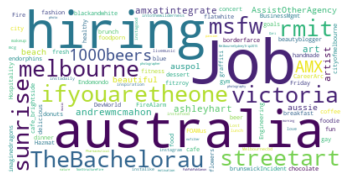

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

threshold = 5

hashtags = []

for item in testdb.view('geo-test/hash-tags', group = True, group_level = 1):
    if item.value >= threshold:
        hashtags.append(item.key)

string = ','.join(hashtags)

wc = WordCloud(background_color="white", max_words=100)

plt.imshow(wc.generate(string), interpolation='bilinear')
plt.axis("off")
plt.show()


In [24]:
# hashtags for now trending in Melbourne

def now_trending(db):
    
    hashtags = {}

    for item in db.view('hashtags/trending', group = True, group_level = 1):
        if item.key.lower() not in hashtags.keys():
            hashtags[item.key.lower()] = item.value
        else:
            hashtags[item.key.lower()] += item.value
        
    hashtags = {k: v for k, v in sorted(hashtags.items(), key=lambda item: item[1])[-20:]}

    return hashtags

now_trending(testdb)

{'it': 19,
 'victoria': 21,
 'sales': 23,
 'streetart': 24,
 'photo': 28,
 'coffee': 29,
 'spring': 30,
 'jobs': 50,
 'msfw': 53,
 'careerarc': 54,
 'hazmat': 54,
 'victraffic': 54,
 'nonstructurefire': 60,
 'incident': 65,
 'structurefire': 80,
 'hiring': 92,
 'firealarm': 95,
 'job': 103,
 'australia': 108,
 'melbourne': 564}